# **DEEP LEARNING**

Name: **GRADIENT DESCENT**  
Date : 2022  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Function and direction of variation


**Derivatives**  
Derivatives are used to find the rate of changes of a quantity with respect to the other quantity.  
By using the application of derivatives we can find the approximate change in one quantity with respect to the change in the other quantity.

> See derivatives rules : https://www.mathsisfun.com/calculus/derivatives-rules.html


### A function

$$f(x) = x^2$$

In [3]:
def f(x):
  return (x**2)

In [4]:
X = np.linspace(-4,4,1000)
Y=[]
for x in X:
  Y.append(f(x))

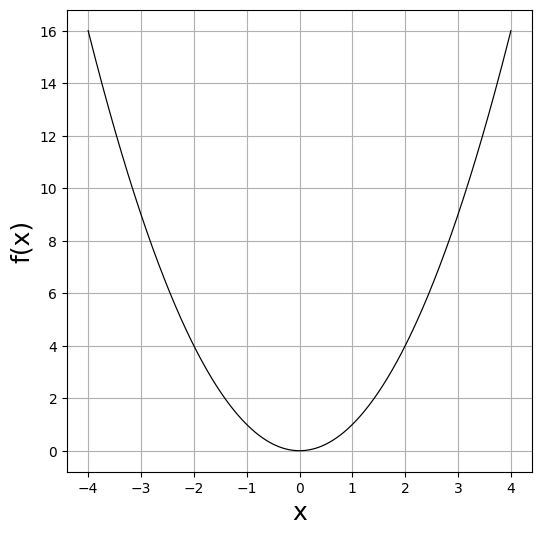

In [5]:
plt.figure(figsize=(6, 6))
plt.plot(X,Y,color="black",linewidth=0.87)
plt.grid()
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)
plt.show()

### Variation of the function

#### Using the derivative

What is the function variation at $a=-3$ ?

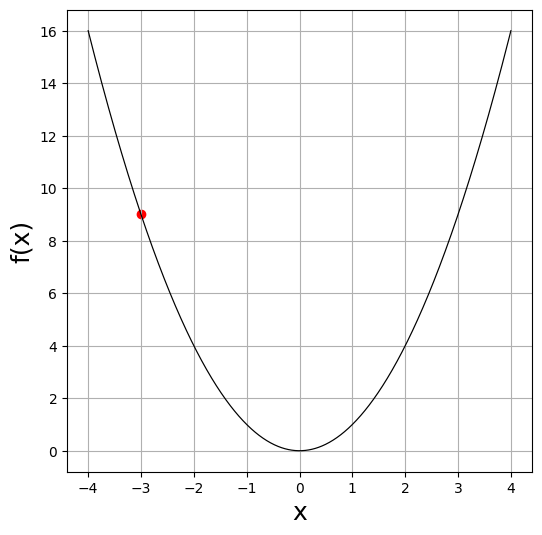

In [6]:
#Choice of a point
a = -3

#f(x)
fa = f(a)

plt.figure(figsize=(6, 6))
plt.plot(X,Y,color="black",linewidth=0.87)
plt.grid()
plt.scatter(x=a,y=fa,color="red")
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)
plt.show()


The function :
$$f(x) = x^2$$

The derivative of the function :
$$f'(x) = 2x $$

In [7]:
def derivativeFunction(x):
  return 2*x

In [8]:
#Function variation at x
derivativeFa = derivativeFunction(a)
print("Derivative f(x):",derivativeFa)

if (derivativeFa>0):
  print("The variation of the function at x=",a," is positive (+)")
else:
  print("The variation of the function at x=",a," is negative (-)")

Derivative f(x): -6
The variation of the function at x= -3  is negative (-)


#### Using tangent equation


Equation of a line
$$y = \beta_0 + \beta_1x$$

Equation of the tangent at point a
$$y = f(a)+ f'(a)(x-a)$$
$$\beta_0 = f(a)$$
$$\beta_1 = f'(a)$$


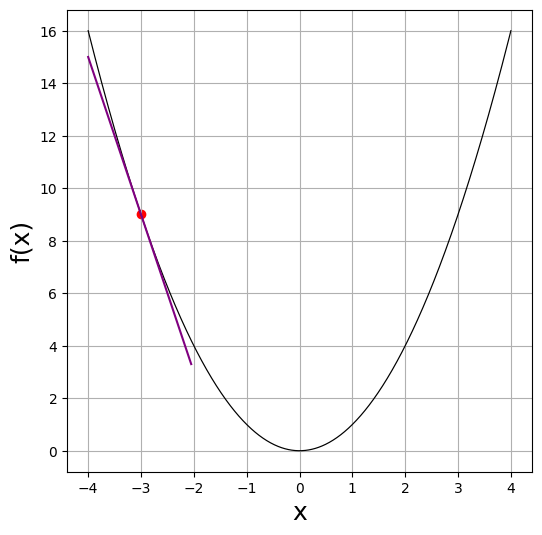

Beta 1 :  -6


In [9]:
a=-3

#Range of x
Xt = np.arange(-4,-2,0.05)

#Betas 
beta_0 = f(a)
beta_1 = derivativeFunction(a)

#Tangent computation
t = []
for x in Xt:
  y = beta_1 * (x-a) + beta_0
  t.append(y)


plt.figure(figsize=(6, 6))
plt.plot(X,Y,color="black",linewidth=0.87)
plt.plot(Xt,t,color="purple")
plt.grid()
plt.scatter(x=a,y=f(a),color="red")
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)
plt.show()

print("Beta 1 : ",beta_1)

$B_1$ is negative, then the varation of the function at a=-3, is negative

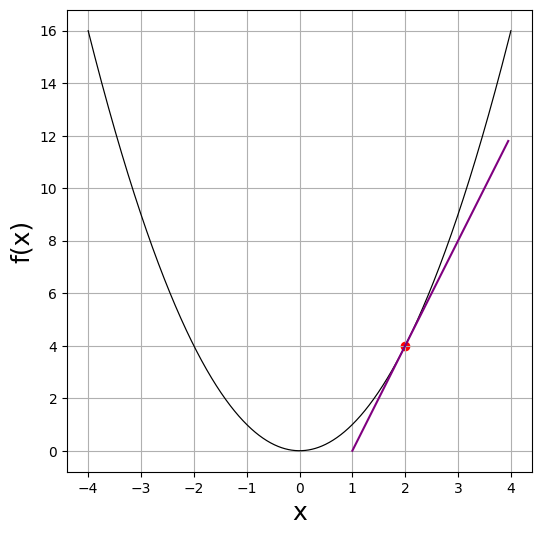

Beta 1 :  4


In [10]:
a=2

#Range of x
Xt = np.arange(1,4,0.05)

#Betas 
beta_0 = f(a)
beta_1 = derivativeFunction(a)

#Tangent computation
t = []
for x in Xt:
  y = beta_1 * (x-a) + beta_0
  t.append(y)


plt.figure(figsize=(6, 6))
plt.plot(X,Y,color="black",linewidth=0.87)
plt.plot(Xt,t,color="purple")
plt.grid()
plt.scatter(x=a,y=f(a),color="red")
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)
plt.show()

print("Beta 1 : ",beta_1)

$B_1$ is positive, then the varation of the function at a=-3, is positive

## Gradient descent

### The principle 

Let f be an error function defined by

$$ f(x) = x^2$$

The objective is to find by successive iterations the value of the parameter a which will minimize the function.  


**How to proceed ?**  
For a given value a, we will look at the direction of variation of the function at point a.
> - If the direction of variation is **negative**, we can then **increase** the value a
> - If the direction of variation is **positive**, we must **decrease** the value of a

**By how much should we increase or decrease a ?**  
We will use a fixed rate, called the **learning rate** noted $\alpha$

$$\text{new a} = a - \alpha \times f'(a)$$

Example 1 :
$$a = -4; \alpha = 0.02$$
$$f'(a) = -8 $$
$$\text{new a}= -4 - 0.02 * -8 = -3.84$$

When the variation is negative, a increases

Example 2 :
$$a = 1; \alpha = 0.02$$
$$f'(a) = 2 $$
$$\text{new a}= 1 - 0.02 * 2 = 0.96$$

When the variation is positive, a decreases

### An interactive example 

In [11]:
def f(x):
  return (x**2)

X = np.linspace(-4,4,1000)
Y=[]
for x in X:
  Y.append(f(x))

In [12]:
def df(x):
  return 2*x

In [13]:
def new_a(a,alpha):
  return a - alpha * df(a)

In [14]:
def gradientDescent(epochs,alpha,a):
  GD = []
  for e in range(0,epochs):
    newa = new_a(a,alpha)
    GD.append([a,f(a),newa])
    a = newa
  return GD


def showGradientDescent(epochs,alpha,a):
  GD = gradientDescent(epochs,alpha,a)

  x = np.array(GD)[:,0]
  y = np.array(GD)[:,1]
  plt.figure(figsize=(10, 10))
  plt.grid()
  plt.plot(X,Y,color="gray" ,linewidth=0.84)
  plt.scatter(x,y,color="red")

  for i in range (1,len(GD)):
    A = [GD[i-1][0], GD[i-1][1]]
    B = [GD[i][0], GD[i][1]]
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1], head_width=0.2, length_includes_head=True, color="purple")

  plt.xlabel('a', fontsize=18)
  plt.ylabel('f(a)', fontsize=18)
  plt.show()






In [15]:
interact(showGradientDescent,
         epochs=widgets.IntSlider(min=10, max=500, step=1, value=200),
         alpha=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.02),
         a=-4)

interactive(children=(IntSlider(value=200, description='epochs', max=500, min=10), FloatSlider(value=0.02, des…

<function __main__.showGradientDescent(epochs, alpha, a)>

Questions
- What happens if we decrease the number of iterations? (epochs = 10, alpha = 0.02, a=-4)
- What happens if we increase the learning rate? (epochs = 200, alpha = 0.91, a=-4)
- What happens if we increase the learning rate and reduce the number of iterations ? (epochs = 15, alpha = 0.94, a=-4)
- What happens if we decrease the learning rate ans epochs ? (epochs = 40, alpha = 0.01, a=-4)

## Different forms of gradient descent

### Gradient descent with momentum

**Adapts the descent rate according to the previous update  
We need to specify the learning rate and the time**

$$pu = \text{previous update}$$
$$m = \text{momentum}$$
$$\text{new a} = a - m \times pu  + \alpha \times f'(a)$$

In [16]:
def f(x):
  return (x**2)

def df(x):
  return 2*x

X = np.linspace(-6,6,1000)
Y=[]
for x in X:
  Y.append(f(x))

In [17]:
#--- MOMENTUM ---
from math import sqrt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(epochs=(0,200,1),alpha=(0.0,0.07,0.01),momentum=(0.0,1,0.01))
def momentum(epochs=20,alpha=0.04,momentum=0.50):

  a=-5 #Start point
  lastUpdate = 0
  history = []

  for i in range(0,epochs):
    fa = f(a)

    #Update of a value form previous update
    #The m parameter is the part of last update
    valueOfUpdate = (momentum * lastUpdate) + (alpha*df(a))

    #New A
    newA = a - valueOfUpdate

    #Backup the update (in history). It will be used in the next iteration
    history.append([a,fa])
    lastUpdate = valueOfUpdate
    a = newA


  
  x = np.array(history)[:,0]
  y = np.array(history)[:,1]
  plt.figure(figsize=(8, 8))
  plt.plot(X,Y,color="black",linewidth=0.87)
  plt.grid()
  plt.scatter(x,y,color="red")


  
  lastExecution = history[epochs-1]
  plt.scatter(lastExecution[0],lastExecution[1],color="green",s=120)



interactive(children=(IntSlider(value=20, description='epochs', max=200), FloatSlider(value=0.04, description=…

We can see that the gradient descent is no longer constant but adjusts according to the previous one.  
- Larger adjustments are made at the beginning

Disadvantages:  
**It find the right time and the right learning rate.**

- Test with m=0.3,0.2,
- If we use m=0.73 we can see that the algorithm goes further than the convergence point and comes back to it

### Adaptive gradient descent (Adagrad)

In [18]:
def f(x):
  return (x**2)

def df(x):
  return 2*x

X = np.linspace(-6,6,1000)
Y=[]
for x in X:
  Y.append(f(x))

$$ \text{new a} = a - f'(a) \times \frac{\alpha}{(\sqrt{\sum^n_{i=1} f'(a_i)^2})+\epsilon}$$

In [19]:
#---- ADAGRAD -------

from math import sqrt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(epochs=(0,200,1),alpha=(0.0,1,0.01),epsilon=(0.0,1,0.0000001))
def adagrad(epochs=200, alpha=0.5,epsilon=0.000000010):

  history = []
  gradients_sum = 0
  a=-5

  for i in range(0,epochs):
    fa = f(a)
    gradient = df(a)
    gradients_sum += gradient ** 2
    valueOfUpdate = alpha / (np.sqrt(gradients_sum)+epsilon)

    newA = a-gradient*valueOfUpdate

    #Sauvegarde des elements
    history.append([a,fa])
    a = newA


  x = np.array(history)[:,0]
  y = np.array(history)[:,1]
  plt.figure(figsize=(8, 8))
  plt.plot(X,Y,color="black",linewidth=0.87)
  plt.grid()
  plt.scatter(x,y,color="red")


  
  lastExecution = history[epochs-1]
  plt.scatter(lastExecution[0],lastExecution[1],color="green",s=120)


interactive(children=(IntSlider(value=200, description='epochs', max=200), FloatSlider(value=0.5, description=…

We can see that the objective is to converge quickly to the local optimum 
is achieved:
Big advances at the beginning then smaller ones towards the end

**The difference with the gradient descent with momentum is that the momentum is calculated.**

### Adaptative Moment Estimation (ADAM)

Adapts the descent speed according to the previous update  
We don't have to specify the time  
**Use of a moving average for the update**

Adam is an adaptive learning rate method, which means, **it computes individual learning rates for different parameters**.

$\beta_1$ and $\beta_2$ are 

> A good post : https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

In [20]:
def f(x):
  return (x**2)

def df(x):
  return 2*x

X = np.linspace(-6,6,1000)
Y=[]
for x in X:
  Y.append(f(x))

In [21]:
from math import sqrt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


@interact(epochs=(0,200,1),alpha=(0.0,1,0.1),beta1=(0.0,1,0.001),beta2=(0.0,1,0.001),epsilon=1e-9)
def adam(epochs=160, alpha=0.09, beta1=0.9, beta2=0.999,epsilon=1e-9 ):
  m=0
  v=0
  a=-5

  history = []
  for i in range(0,epochs):
    
    fa = f(a)
    gradient = df(a)
    m = beta1 * m + (1. - beta1) * gradient
    v = beta2 * v + (1. - beta2) * gradient ** 2

    #MBias corrected estimators for the first and second moments.
    mt_hat = m / (1. - beta1 ** (i+1))
    vt_hat = v / (1. - beta2 ** (i+1))
    
    newA = a - alpha*mt_hat / (sqrt(vt_hat)+epsilon)

    #History
    history.append([a,fa])
    a = newA


  #Affichage du graphique
  x = np.array(history)[:,0]
  y = np.array(history)[:,1]
  plt.figure(figsize=(8, 8))
  plt.plot(X,Y,color="black",linewidth=0.87)
  plt.grid()
  plt.scatter(x,y,color="red")


  lastExecution = history[epochs-1]
  plt.scatter(lastExecution[0],lastExecution[1],color="green",s=120)

interactive(children=(IntSlider(value=160, description='epochs', max=200), FloatSlider(value=0.09, description…

## Linear regression, gradient descent and MSE

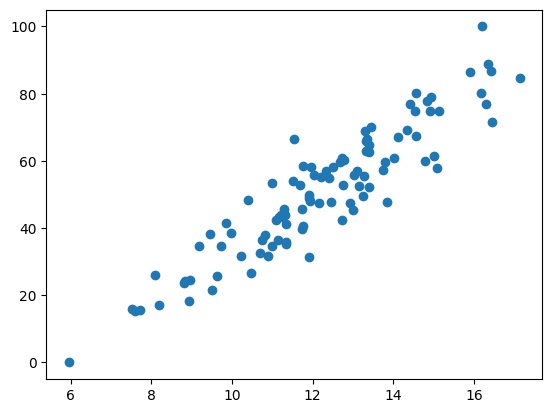

In [22]:

import matplotlib.pyplot as plt

#Dataset
X = [[14.828200297790497], [12.717617670595427], [9.855722677610249], [13.285618331488184], [11.302064405386776], [14.11922134525173], [11.341455767968844], [13.856400108964912], [14.02919072210217], [15.008832244730058], [14.55475626093806], [16.345091416164923], [14.346166449988527], [11.95082028040622], [10.478765992767032], [12.729401941338756], [7.600824690300561], [13.78316858278339], [15.077498806239877], [5.950637239775639], [13.741785382528082], [12.7426938733701], [11.335675616074358], [14.788505294255184], [16.411609139535017], [16.164121922303885], [10.998403275202989], [12.41043490222512], [10.995733469426508], [9.509483439798323], [13.392781428779365], [13.43924504586418], [13.152638180449722], [11.175599490582403], [10.229939811196973], [12.992153089672808], [11.752481623835331], [13.404090062619085], [14.556362280257973], [11.770765625516809], [13.403489013771035], [10.807694999235103], [16.307574641020064], [11.20432445431588], [11.914616563191661], [11.519729617169606], [11.747240761026777], [10.887200613487188], [13.321877774149211], [13.02215898751189], [11.68084463350558], [12.512783641606154], [11.91465760762705], [16.19473511185379], [11.537294298959209], [13.359045723921152], [13.32815857850891], [12.035852558340457], [11.913532166562133], [7.531077713497768], [13.310209923486989], [11.93555924878366], [9.73416256498493], [10.744867265306619], [8.841212629669704], [14.921612476332221], [8.187705418717417], [7.716799388355505], [11.094281176897569], [14.418586822882272], [14.531314555985496], [8.969240746661772], [8.803695024081431], [9.447890875072444], [10.401956191943405], [16.448032038768478], [14.938862817805898], [13.104905678915086], [13.240300692661439], [11.139043188687044], [8.092399611593166], [12.777306474274665], [12.928420702974925], [9.179534877753923], [15.142805565547288], [12.2108792940294], [11.32631403516262], [12.466256938155166], [9.96792219916394], [12.15433924707204], [9.622516056444244], [15.890600071427057], [12.66882051171981], [11.245607391038659], [11.34840307260053], [17.130695461272346], [8.938129534466357], [10.700389479013229], [12.319974696049165], [11.726969060371964]]
y = [77.91266550022249, 42.347935923469045, 41.556930759410236, 55.3890238914296, 45.75769575029971, 66.97260113072227, 35.341956793423726, 47.671646602517, 60.93377547724033, 61.50309755948892, 67.43762804879938, 88.97066733286854, 69.21759941005506, 58.30238602864868, 26.669416884689713, 60.92923368329265, 15.465731993019288, 59.808309763912334, 57.97983230366678, 0.0, 57.39930238277367, 52.76974286138199, 35.96002390203201, 59.91965856208926, 86.7300708359092, 80.08766253316001, 53.3717269595073, 55.001437427744236, 34.54612762726287, 21.571301935504405, 62.68247681615009, 69.96271444633088, 52.386312190797625, 43.37261733968375, 31.8032602749647, 45.44308009969601, 40.63964686970972, 52.153496666002944, 80.28998880325614, 58.57085755426052, 64.66499337732638, 37.83038947575537, 76.91074604877154, 43.99599411782833, 49.871732678154316, 53.9935813467134, 45.62948652675443, 31.745476596414004, 65.80923459320003, 55.78585693375369, 52.89091281654659, 58.05445779952504, 31.46455675247858, 100.0, 66.40305385085446, 66.61315706637656, 62.89419422533741, 55.90817633048063, 48.85672024114095, 16.02289946370001, 68.91079815198894, 48.18640663496652, 34.564941724692524, 36.345937154127, 24.178051942619547, 74.84863712429544, 17.08081301050585, 15.71049170713455, 42.501064426637306, 76.85357213082523, 74.71022480489395, 24.40451271507469, 23.540872275694685, 38.34779648334142, 48.40436985033521, 71.48261020472637, 78.88951630021808, 57.12106569977281, 49.58972682867596, 36.39689017533619, 26.1812036141705, 60.38998239240129, 47.54095828348623, 34.65740729230984, 74.8522395340805, 55.24389595481103, 43.90979537711563, 47.832498419419544, 38.66290330453565, 47.37092327819375, 25.76240431848453, 86.31556117900996, 59.59674561796689, 43.223979088022176, 41.27895625878255, 84.56345724199488, 18.198631032486936, 32.477426427112846, 56.930806045214275, 39.67977139816933]
plt.scatter(X,y)
plt.show()

In [23]:
#-- Recherche de m et b

from sklearn.linear_model import LinearRegression
import numpy as np

regressionLineaire = LinearRegression().fit(X, y)
m = regressionLineaire.coef_[0]
b= regressionLineaire.intercept_
print("m :",m)
print("b :",b)

ModuleNotFoundError: No module named 'sklearn'

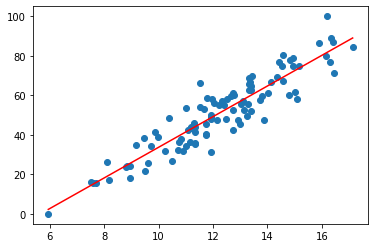

In [ ]:
#Affichage de la droite de régression
x_a_predire = np.linspace(min(X), max(X), num=500)
y_hat=[]
for x in x_a_predire:
  y_hat.append(m*x+b)
plt.scatter(X,y)
plt.plot(x_a_predire,y_hat,color="red")
plt.show()



In [ ]:
#-- Fonction de cout MSE --

def MSE(y,predictions):
  n = len(y)
  sommeErreurs = 0
  for k in range(0, len(y)):
    sommeErreurs += (y[k]-predictions[k])**2
  return sommeErreurs/n

#--- Calcul de la MSE manuelle
m=7.72
b = -44

predictions = []
for x in X:
  pred = x[0]*m+b
  predictions.append(pred)

print("MSE :",MSE(y, predictions))


MSE : 53.17424368066742


In [ ]:
#--  REPRESENTATION GRAPHIQUE DE LA MSE : CALCULS  --

#--- Calcul de la MSE pour un ensemble de couple m et b ---
sauvegarde=[]

# On sait que b est égal à -43, on centre donc cette valeur pour le choix de
# l'interval afin de visualiser la convexité de la fonction MSE
bMin = -86
bMax = 0

# On sait que b est égal à 7, on centre donc cette valeur pour le choix de
# l'interval afin de visualiser la convexité de la fonction MSE
mMin =0
mMax = 14

#On va créer 900 points
nbPoints = 900

#Generation de b et de m:
valeursB = np.linspace(start=bMin, stop=bMax, num=nbPoints)
valeursM = np.linspace(start=mMin, stop=mMax, num=nbPoints)

#Création de tableaux permettant de stocker les coordonnées pour la visualisation 3d 
#Nous avons 900 m et 900 b. Il faut tester tous les cas possibles
#soit 900x900.
#C'est pourquoi le tableau graphiqueMSE comporte 900x900 cellules
#Cela correspond au produit cartesien des m et b
graphiqueM, graphiqueB = np.meshgrid(valeursM, valeursB)
graphiqueMSE = np.zeros((nbPoints,nbPoints))

#Calcul de la MSE pour chacun des couple m et b
for i in range(nbPoints):
  for j in range (nbPoints):

    m = graphiqueM[i][j]
    b = graphiqueB[i][j]

    predictions = []
    for x in X:
      pred = x[0]*m+b
      predictions.append(pred)

    mse = MSE(y,predictions)

    sauvegarde.append([m,b,mse])

    graphiqueMSE[i][j] = mse
    


In [ ]:
#--  REPRESENTATION GRAPHIQUE DE LA MSE : POINT MINIMAL  --

#Recherche des coordonnées du minimum de la MSE
mseMIN = graphiqueMSE.min()
coordonnees = np.unravel_index(indices=graphiqueMSE.argmin(), shape=graphiqueMSE.shape)
i=coordonnees[0]
j=coordonnees[1]

mMIN = graphiqueM[i][j]
bMIN = graphiqueB[i][j]

print("MSE = ",mseMIN)
print("m = ",mMIN)
print("b = ",bMIN)

MSE =  52.840953472788726
m =  7.755283648498331
b =  -43.813125695216904


In [ ]:
#--  REPRESENTATION GRAPHIQUE DE LA MSE : VISUALISATION 3D  --

#--- Visualisation  3D de la MSE ---

from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

@interact(angleHorizontal=(-360,360,10))
def visualisation3D(angleHorizontal=10):
  fig = plt.figure(figsize=[12,12])
  ax = plt.axes(projection='3d')

  ax.set_xlabel('m', fontsize=20)
  ax.set_ylabel('b', fontsize=20)
  ax.set_zlabel('mse', fontsize=20)
  
  ax.plot_wireframe(graphiqueM, graphiqueB, graphiqueMSE,rstride=20, cstride=20)
  ax.scatter3D(mMIN, bMIN, mseMIN, 'ro', color="red", s=200) 

  angleElevation=20

  ax.view_init(angleElevation, angleHorizontal)
  plt.show()



interactive(children=(IntSlider(value=10, description='angleHorizontal', max=360, min=-360, step=10), Output()…

In [ ]:
#--- Descente de gradient ---

def deriveePartielleRespectM(X,erreurs):
  n= len(X)
  somme=0
  for i in range(0,len(X)):
    somme += -2*X[i][0] * erreurs[i]

  return somme/n

def deriveePartielleRespectB(erreurs):
  n=len(erreurs)
  somme = 0
  for i in range(0,len(erreurs)):
    somme += -2*erreurs[i]
  return somme/n


def descenteGradient():
  iterations = 100000
  alpha = 0.001
  m=0
  b=-86
  sauvegarde=[]
  
  for i in range(0,iterations):

    predictions=[]
    erreurs = []

    #Calcul des prédictions sur l'ensemble du dataset
    for index in range(0,len(X)):
      prediction = m*X[index][0]+b
      attendu = y[index]
      erreur = attendu-prediction
      predictions.append(prediction)
      erreurs.append(erreur)

    #Calcul des dérivées partielles
    dm = deriveePartielleRespectM(X,erreurs)
    db = deriveePartielleRespectB(erreurs)
    
    #mise à jour de m et b
    m -= alpha*dm
    b -= alpha*db

    #Calcul de la MSE
    predictions = []
    for x in X:
      pred = x[0]*m+b
      predictions.append(pred)

    mse = MSE(y,predictions)

    sauvegarde.append([m,b,mse])

    print("Iteration ",i+1,"m=",m,"b=",b,"   MSE =",mse)

    #Critere d'arret : On utilise la valeur estimée avec la regression linéaie
    #de SciKit Learn
    if mse <= 52.840953472788726:
      print("TERMINE....")
      break;

    
  return sauvegarde



historiqueDG = descenteGradient()


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Iteration  72979 m= 7.783395205945931 b= -44.21397554106514    MSE = 52.84285959247791
Iteration  72980 m= 7.783393410121497 b= -44.21395281557206    MSE = 52.84285907282191
Iteration  72981 m= 7.783391614414635 b= -44.2139300915668    MSE = 52.84285855323397
Iteration  72982 m= 7.783389818825336 b= -44.213907369049274    MSE = 52.842858033714016
Iteration  72983 m= 7.783388023353594 b= -44.21388464801938    MSE = 52.84285751426209
Iteration  72984 m= 7.783386227999401 b= -44.213861928477016    MSE = 52.84285699487822
Iteration  72985 m= 7.783384432762748 b= -44.21383921042209    MSE = 52.8428564755623
Iteration  72986 m= 7.783382637643629 b= -44.2138164938545    MSE = 52.84285595631438
Iteration  72987 m= 7.7833808426420354 b= -44.21379377877415    MSE = 52.84285543713449
Iteration  72988 m= 7.783379047757959 b= -44.21377106518095    MSE = 52.84285491802257
Iteration  72989 m= 7.783377252991393 b= -44.213748

In [ ]:
#--- Affichage de la descente de gradient ---

tabM = [row[0] for row in historiqueDG]
tabB = [row[1] for row in historiqueDG]
tabMSE = [row[2] for row in historiqueDG]


@interact(angleHorizontal=(-360,360,10))
def visualisationDescenteGradient3D(angleHorizontal=-60):
  fig = plt.figure(figsize=[12,12])
  ax = plt.axes(projection='3d')

  ax.set_xlabel('m', fontsize=20)
  ax.set_ylabel('b', fontsize=20)
  ax.set_zlabel('mse', fontsize=20, labelpad=15)
  
  ax.plot_wireframe(graphiqueM, graphiqueB, graphiqueMSE,rstride=20, cstride=20)
  ax.scatter3D(tabM, tabB, tabMSE, 'ro', color="red", s=200) 

  angleElevation=20

  ax.view_init(angleElevation, angleHorizontal)
  plt.show()


interactive(children=(IntSlider(value=-60, description='angleHorizontal', max=360, min=-360, step=10), Output(…

In [ ]:
# Affichage de la droite de régression et création d'un gif animé
import imageio
import os

tabM = [row[0] for row in historiqueDG]
tabB = [row[1] for row in historiqueDG]
tabMSE = [row[2] for row in historiqueDG]

filenames = []
filename=""
x_a_predire = np.linspace(min(X), max(X), num=500)

for i in range(0,len(historiqueDG)):
  if i % 1000 ==0 :
    y_hat=[]
    for x in x_a_predire:
      m = historiqueDG[i][0]
      b = historiqueDG[i][1]
      y_hat.append(m*x+b)
    
    #Creation du graphique
    plt.figure(figsize=(8, 8))
    plt.scatter(X,y)
    plt.plot(x_a_predire,y_hat,color="red")
    plt.title("Iteration :"+str(i+1))

    #Sauvegarde du graphique au format png
    filename = f'{i}.png'
    filenames.append(filename)
    plt.savefig(filename)
    
    plt.close()



#Utilisation de imageio pour la création du gif
with imageio.get_writer('Descente_gradient.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

#NB: Le gif se trouve dans le dossier fichier de google colab
        
#Suppression des images de chaque graphiques généré, pour ne garder que le gif
for filename in set(filenames):
    os.remove(filename)


## Descente de gradient stochastique (SGD)

In [ ]:
#--- Descente de gradient stochastique ---

def deriveePartielleRespectM(X,erreurs):
  n= len(X)
  somme=0
  for i in range(0,len(X)):
    somme += -2*X[i][0] * erreurs[i]

  return somme/n

def deriveePartielleRespectB(erreurs):
  n=len(erreurs)
  somme = 0
  for i in range(0,len(erreurs)):
    somme += -2*erreurs[i]
  return somme/n


def descenteGradientStochastique():
  iterations = 100000
  alpha = 0.001
  m=0
  b=-86
  batch_size = 1
  sauvegarde=[]
  
  for i in range(0,iterations):

    predictions=[]
    erreurs = []

    #Choix d'un nombre d'observations au hasard
    tabIndex = np.random.randint(0,len(X),batch_size)

    #Selection des observations
    Xselection = []
    Yselection = []

    for index in tabIndex :
      Xselection.append(X[index])
      Yselection.append(y[index])

    #Utilisation des observations selectionnées
    for inx in range(0,len(Xselection)):
      prediction = m*Xselection[inx][0]+b
      attendu = Yselection[inx]
      erreur = attendu-prediction
      predictions.append(prediction)
      erreurs.append(erreur)

   
    #Calcul des dérivées partielles
    dm = deriveePartielleRespectM(Xselection,erreurs)
    db = deriveePartielleRespectB(erreurs)
      
    #mise à jour de m et b
    m -= alpha*dm
    b -= alpha*db

    #Calcul de la MSE
    predictions = []
    for x in X:
      pred = x[0]*m+b
      predictions.append(pred)

    mse = MSE(y,predictions)

    sauvegarde.append([m,b,mse])

    print("Iteration ",i+1,"m=",m,"b=",b,"   MSE =",mse)

    #Critere d'arret : On utilise la valeur estimée avec la regression linéaie
    #de SciKit Learn
    if mse <= 52.840953472788726:
      print("TERMINE....")
      break;

  return sauvegarde


historiqueSGD = descenteGradientStochastique()

In [ ]:
#--- Affichage de la descente de gradient stochastique ---

tabM = [row[0] for row in historiqueSGD]
tabB = [row[1] for row in historiqueSGD]
tabMSE = [row[2] for row in historiqueSGD]


@interact(angleHorizontal=(-360,360,10))
def visualisationDescenteGradientStochastique3D(angleHorizontal=-60):
  fig = plt.figure(figsize=[12,12])
  ax = plt.axes(projection='3d')

  ax.set_xlabel('m', fontsize=20)
  ax.set_ylabel('b', fontsize=20)
  ax.set_zlabel('mse', fontsize=20,labelpad=15)
  
  ax.plot_wireframe(graphiqueM, graphiqueB, graphiqueMSE,rstride=20, cstride=20)
  ax.scatter3D(tabM, tabB, tabMSE, 'ro', color="red", s=50) 

  angleElevation=20

  ax.view_init(angleElevation, angleHorizontal)
  plt.show()